# Анализ интернет-магазина по продаже продуктов питания

## Загрузка данных и подготовка их к анализу.

### Импортируем нужные модули.

In [ ]:
import pandas as pd
import os
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

### Загрузим данные.

1. C помощью библиотеки os и проверкой на правильности пути файла, загрузим данные с помощью функции read_csv().

In [ ]:
path = '/datasets/logs_exp.csv'

if os.path.exists(path):
    data = pd.read_csv(path, sep='\t')
else:
    print('Something is wrong')

2. Выведем для наглядности всю таблицу.

In [ ]:
data.head(10)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246


3. Выведем основную информацию о столбцах таблицы.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


**Вывод:** после выгрузки файла можем сделать вывод, что таблица состоит из четырех полей и 244126 записей. Уже можем заметить, что названия столбцов написаны неверно, столбец 'EventTimestamp' стоит привести в формат даты и времени, датафрейм стоит проверить на наличие пропусков и дубликатов.

### Предобработка данных.

1. Заменим название столбцов на правильный формат. Сделаем это с помощью метода rename().

In [ ]:
data = data.rename(columns={'EventName':'event_name', 'DeviceIDHash':'device_id_hash','EventTimestamp':'event_timestamp','ExpId':'exp_id'})

In [ ]:
data

,event_name,device_id_hash,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


2. Проверим датафрейм на наличие дубликатов.

In [ ]:
data.duplicated().sum()

413

**Вывод:** в датафрейме 413 дубликатов, не такое большое количество, поэтому можем их удалить.

3. С помощью функции drop_duplicates() удаляем дубликаты из датафрейма.

In [ ]:
data = data.drop_duplicates()

4. Проверим таблица на наличие пропусков.

In [ ]:
data.isna().sum()

event_name         0
device_id_hash     0
event_timestamp    0
exp_id             0
dtype: int64

**Вывод:** в датафрейме пропуски отсутствуют.

### Добавление новых столбцов в таблицу.

1. Добавим новый столбец, в котором будет показана дата совершенной операции.

In [ ]:
data['event_datetime'] = pd.to_datetime(data['event_timestamp'], unit='s').dt.strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
data

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58


2. Добавим новый столбец, в котором будет показана дата совершенной операции.

In [ ]:
data['event_date'] = pd.to_datetime(data['event_timestamp'], unit='s').dt.strftime('%Y-%m-%d')

In [ ]:
data

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime,event_date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


3. Выведем общую информацию о таблице.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_name       243713 non-null  object
 1   device_id_hash   243713 non-null  int64 
 2   event_timestamp  243713 non-null  int64 
 3   exp_id           243713 non-null  int64 
 4   event_datetime   243713 non-null  object
 5   event_date       243713 non-null  object
dtypes: int64(3), object(3)
memory usage: 13.0+ MB


**Вывод:** тип данных новых столбцов с датами: 'object', необходимо их заменить в тип данных времени.

4. Воспользуемся методом astype() и изменим тип данных с 'object' на 'datetime64'.

In [ ]:
data['event_datetime'] = data['event_datetime'].astype('datetime64[ns]')
data['event_date'] = data['event_date'].astype('datetime64[ns]')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       243713 non-null  object        
 1   device_id_hash   243713 non-null  int64         
 2   event_timestamp  243713 non-null  int64         
 3   exp_id           243713 non-null  int64         
 4   event_datetime   243713 non-null  datetime64[ns]
 5   event_date       243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 13.0+ MB


**Общий вывод по разделу:** в данном разделе мы загрузили основной датафрейм, предобработали его: изменили названия столбцов на правильный формат, удалили дубликаты, проверили на пропуски, которых не было. Добавили два новых столбца: с датой и временем и датой, изменили . Датасет готовы для дальнейшего анализа.

## Изучение и проверка данных.

### Сколько всего событий в логе?

1. Чтобы проверить сколько всего уникальных событий в логе, воспользуемся методом unique().

In [ ]:
data['event_name'].unique()

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

**Вывод:** всего в датафрейме 5 уникальных видов событий.

2. Узнаем, общее количество событий в логе.

In [ ]:
data['event_name'].count()

243713

**Вывод:** всего в датафрейме было совершено 243713 событий.

### Сколько всего пользователей в логе?

1. С помощью метода unique().size узнаем сколько уникальных пользователей было в логе.

In [ ]:
data['device_id_hash'].unique().size

7551

**Вывод:** всего в датафрейме 7551 уникальный пользователь.

### Сколько в среднем событий приходится на пользователя?

1. Создадим новую переменную и сгруппируем по столбцу 'device_id_hash'. Таким образом, мы сможем узнать количество событий каждого пользователя.

In [ ]:
count_events = data.groupby('device_id_hash').agg({'device_id_hash':'count'})
count_events.rename(columns={'device_id_hash':'count_events'})

,count_events
device_id_hash,
6888746892508752,1
6909561520679493,5
6922444491712477,47
7435777799948366,6
7702139951469979,137
...,...
9217594193087726423,9
9219463515465815368,17
9220879493065341500,7


2. C помощью метода mean() узнаем среднее значение в столбце 'count_events'.

In [ ]:
count_events.mean()

device_id_hash    32.275593
dtype: float64

**Вывод:** в среднем на одного пользователя приходится ±32 события.

### Данными за какой период мы располагаем?

1. С помощью метода min() узнаем с какого числа учитываются данные.

In [ ]:
data['event_date'].min()

Timestamp('2019-07-25 00:00:00')

2. С помощью метода max() узнаем по какое число учитываются данные.

In [ ]:
data['event_date'].max()

Timestamp('2019-08-07 00:00:00')

**Вывод:** мы обладаем данными с 25 июля 2019 года по 7 августа 2019 года.

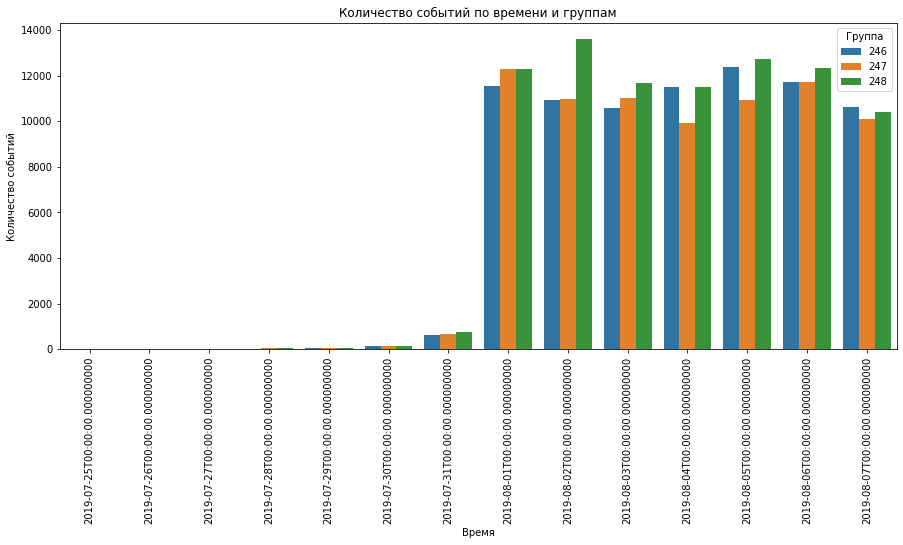

In [ ]:
# Группируем данные по столбцам 'timestamp' и 'group' и вычисляем количество событий
event_counts = data.groupby(['event_date', 'exp_id']).size().reset_index(name='count')

# Создаем столбчатую диаграмму с использованием Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x='event_date', y='count', hue='exp_id', data=event_counts)

plt.title('Количество событий по времени и группам')
plt.xlabel('Время')
plt.ylabel('Количество событий')
plt.xticks(rotation=90)

plt.legend(title='Группа', loc='upper right')
plt.show()

**Вывод:** по графику видно, с 25 июля 2019 по 31 июля 2019 года не так много данных, можно предположить, что эти данные из прошлого анализа. Они нам не нужны, поэтому их нужно будет удалить.